## Observations and Insights

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by regimen
grouped_data = merged_data.groupby(["Drug Regimen"])
summ_stats = grouped_data.mean()

#Create and populate columns with values grouped by Regimen
summ_stats['Average Tumor Volume'] = grouped_data['Tumor Volume (mm3)'].mean()
summ_stats['Median Tumor Volume'] = grouped_data['Tumor Volume (mm3)'].median()
summ_stats['Standard Deviation of Tumor Volume'] = grouped_data['Tumor Volume (mm3)'].std()
summ_stats['Variance of Tumor Volume'] = grouped_data['Tumor Volume (mm3)'].var()
summ_stats['SEM of Tumor Volume'] = grouped_data['Tumor Volume (mm3)'].sem()

#Create new dataframe with calculated values
Summary_stats = pd.DataFrame({"Average Tumor Volume": summ_stats['Average Tumor Volume'],
                              "Median Tumor Volume": summ_stats['Median Tumor Volume'],
                              "Standard Deviation of Tumor Volume": summ_stats['Standard Deviation of Tumor Volume'],
                              "Variance of Tumor Volume": summ_stats['Variance of Tumor Volume'],
                              "SEM of Tumor Volume": summ_stats['SEM of Tumor Volume']})
Summary_stats

,Average Tumor Volume,Median Tumor Volume,Standard Deviation of Tumor Volume,Variance of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

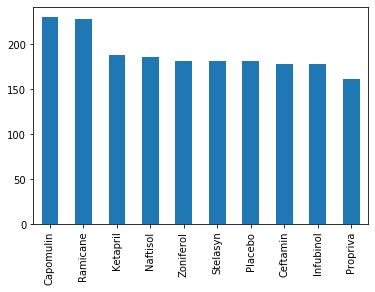

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# value count each time the regimen shows up
bar_pd = merged_data['Drug Regimen'].value_counts()

#Plot bar chart
bar_pd.plot(kind = "bar")


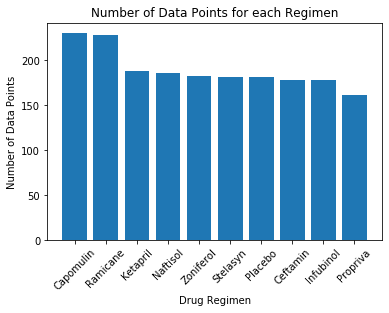

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# populate x and y axis
x_axis = bar_pd.index.values
y_axis = bar_pd.values

#Label graph and format 
plt.title("Number of Data Points for each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.bar(x_axis, y_axis, align='center')
plt.xticks(rotation = 45);

## Pie plots

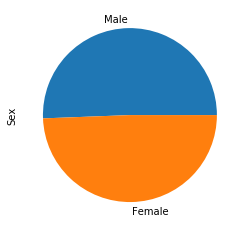

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using panda

#store count of how many male and females mice
pie_pd = merged_data['Sex'].value_counts()

#plot graph
pie_pd.plot(kind = 'pie')

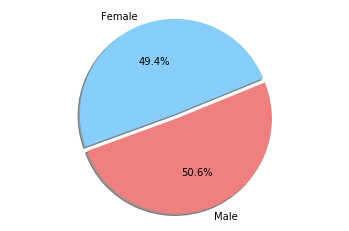

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.05,0)

#Colors for chart
colors = ["lightcoral","lightskyblue"]

#Assign labels
pie_labels = pie_pd.index.values
plt.pie(pie_pd, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# print the final product to the screen
plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Create dataframe with only the promising regimens
promising_df = merged_data[(merged_data["Drug Regimen"] != 'Ketapril') 
                             & (merged_data["Drug Regimen"] != 'Naftisol') 
                             & (merged_data["Drug Regimen"] != 'Placebo') 
                             & (merged_data["Drug Regimen"] != 'Propriva')
                             & (merged_data["Drug Regimen"] != 'Stelasyn') 
                             & (merged_data["Drug Regimen"] != 'Zoniferol')]

#Find the final tumor volume of each unique mouse ID
max_tumor = promising_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
max_tumor

#Create data frames for each regimen and include the tumor volume column
inf_df = merged_data.loc[merged_data["Drug Regimen"] == 'Infubinol']["Tumor Volume (mm3)"]
ceft_df = merged_data.loc[merged_data["Drug Regimen"] == 'Ceftamin']["Tumor Volume (mm3)"]
ram_df = merged_data.loc[merged_data["Drug Regimen"] == 'Ramicane']["Tumor Volume (mm3)"]
cap_df = merged_data.loc[merged_data["Drug Regimen"] == 'Capomulin']["Tumor Volume (mm3)"]

#Populate list with each frame
drug_list = [inf_df, ceft_df, ram_df, cap_df]

#loop through list and calculate IQR for each data frame
for drug in drug_list:
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of Volume is: {lowerq}")
    print(f"The upper quartile of Volume is: {upperq}")
    print(f"The interquartile range of Volume is: {iqr}")
    print(f"The the median of Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-----------------------------------------------")
    

The lower quartile of Volume is: 47.3123533
The upper quartile of Volume is: 57.314443967500004
The interquartile range of Volume is: 10.002090667500006
The the median of Volume is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
-----------------------------------------------
The lower quartile of Volume is: 47.208427112500004
The upper quartile of Volume is: 56.801437570000004
The interquartile range of Volume is: 9.5930104575
The the median of Volume is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.
-----------------------------------------------
The lower quartile of Volume is: 36.67463458499999
The upper quartile of Volume is: 45.0
The interquartile range of Volume is: 8.325365415000007
The the median of Volume is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
--------------------

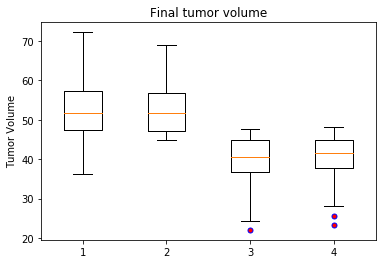

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Plot boxlot
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume')
ax1.set_ylabel('Tumor Volume')
flierprops = dict(marker='o', markerfacecolor='r', markersize=5,
                  linestyle='none', markeredgecolor='b')
ax1.boxplot(drug_list, flierprops=flierprops)
plt.show()

## Line and scatter plots

In [39]:
cap_df

0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64

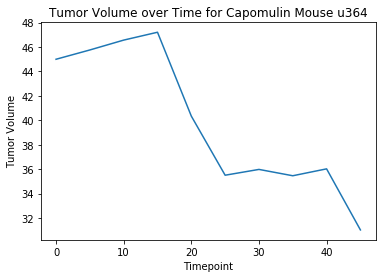

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create df for mouse u364 
cap_df_line = merged_data.loc[(merged_data["Drug Regimen"] == 'Capomulin') & (merged_data['Mouse ID'] == 'u364')][["Tumor Volume (mm3)", "Timepoint"]]

#plot the change over time for mouse u364
x_axis_line = cap_df_line["Timepoint"]
y_axis_line = cap_df_line["Tumor Volume (mm3)"]
finalVolume, = plt.plot(x_axis_line, y_axis_line)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mouse u364')
plt.show()

Text(0, 0.5, 'Tumor Volume')

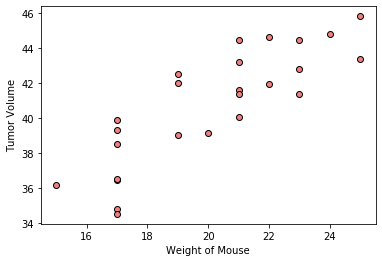

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#create data frame with only Capomulin
cap_df_scatter = merged_data.loc[merged_data["Drug Regimen"] == 'Capomulin']

#find the average for weight and tumor volume
x_axis_scatter = cap_df_scatter.groupby(cap_df_scatter["Mouse ID"])["Weight (g)"].mean()
y_axis_scatter = cap_df_scatter.groupby(cap_df_scatter["Mouse ID"])["Tumor Volume (mm3)"].mean()

#plot
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="lightcoral", edgecolors="black")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")

The Correlation Coefficient is: 0.8419363424694718


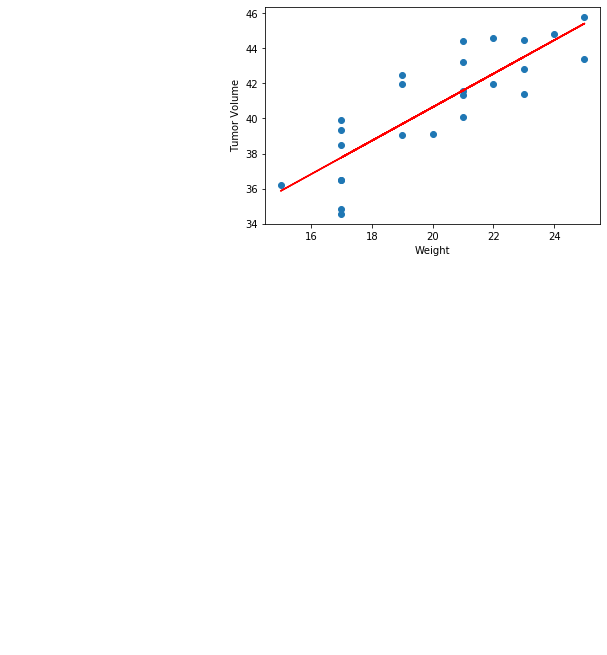

In [50]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_df_scatter.groupby(cap_df_scatter["Mouse ID"])["Weight (g)"].mean()
y_values = cap_df_scatter.groupby(cap_df_scatter["Mouse ID"])["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The Correlation Coefficient is: {rvalue}")
plt.show()